# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [134]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [138]:
#### Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key 


# Define an empty list to fetch the weather data for each city
city_data_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):    # DEBUG (TO BE REMOVED LATER)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
          
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
    
    # Run an API request for each of the cities
    try:       
     # Parse the JSON and retrieve data
        city_data = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#Research how to extract data from a s json using dictionaries
        
        city_lat = city_data["coord"]["lat"]
        city_lon = city_data["coord"]["lon"]
        city_temp_max = city_data["main"]["temp_max"]
        city_humidity = city_data["main"]["humidity"]
        city_clouds = city_data["clouds"]["all"]
        city_wind = city_data["wind"]["speed"]
        city_country = city_data["sys"]["country"]
        city_date = city_data["dt"]

    # Append the City information into city_data list
        city_data_list.append({"City": city, 
                           "Lat": city_lat, 
                           "Lon": city_lon, 
                           "Temp Max": city_temp_max,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})
       
    
    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping {city}...")
        pass
              
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    #use request module (request.get(city_url).json()
   # city_data = requests.get(city_url).json()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | villazon
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping {city}...
Processing Record 8 of Set 1 | harlingen
Processing Record 9 of Set 1 | espanola
Processing Record 10 of Set 1 | gunjur
Processing Record 11 of Set 1 | snasa
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | muros
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | luebo
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | nikolskoye
Processing 

SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?units=metric&appid=f338a58846cd6b3dd26722a63e53bc77&q=albacete (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)')))

In [75]:
len(city_data_list)


584

In [76]:
# Convert the cities weather data into a Pandas DataFrame
 # YOUR CODE HERE
city_data_df = pd.DataFrame(city_data_list)

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,kavaratti,10.5669,72.6420,28.16,76,14,6.87,IN,1690744655
1,juegang,32.3174,121.1855,27.17,93,41,6.48,CN,1690744656
2,hobyo,5.3505,48.5268,24.84,84,16,11.02,SO,1690744656
3,port alfred,-33.5906,26.8910,12.56,58,13,10.05,ZA,1690744627
4,rosario oeste,-14.8361,-56.4275,36.44,20,2,1.25,BR,1690744657
...,...,...,...,...,...,...,...,...,...
579,ippy,6.2679,21.2247,22.30,95,100,1.96,CF,1690744937
580,yaan,7.3833,8.5667,24.59,91,100,3.15,NG,1690744937
581,ayacucho,-13.1583,-74.2239,21.92,30,40,1.54,PE,1690744938
582,caravelas,-17.7125,-39.2481,22.73,73,95,5.92,BR,1690744938


In [77]:
# Show Record Count
city_data_df.count()

City          584
Lat           584
Lon           584
Temp Max      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,kavaratti,10.5669,72.6420,28.16,76,14,6.87,IN,1690744655
1,juegang,32.3174,121.1855,27.17,93,41,6.48,CN,1690744656
2,hobyo,5.3505,48.5268,24.84,84,16,11.02,SO,1690744656
3,port alfred,-33.5906,26.8910,12.56,58,13,10.05,ZA,1690744627
4,rosario oeste,-14.8361,-56.4275,36.44,20,2,1.25,BR,1690744657


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,28.25,77,2,6.72,IN,1690722961
1,juegang,32.3174,121.1855,27.73,88,72,6.73,CN,1690722962
2,hobyo,5.3505,48.5268,26.56,73,21,12.43,SO,1690722964
3,port alfred,-33.5906,26.8910,15.10,59,42,7.15,ZA,1690722964
4,rosario oeste,-14.8361,-56.4275,28.68,42,3,1.01,BR,1690722965


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

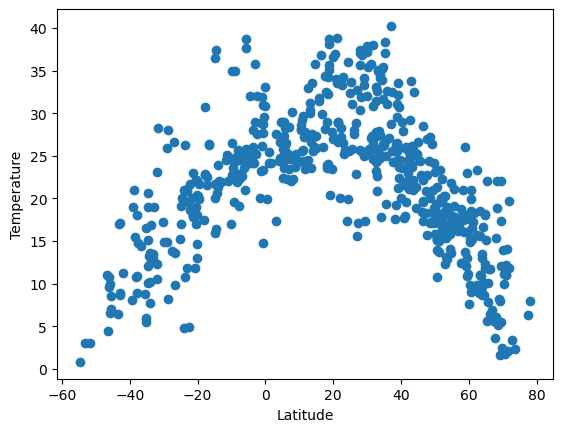

In [79]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Temp Max"]

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

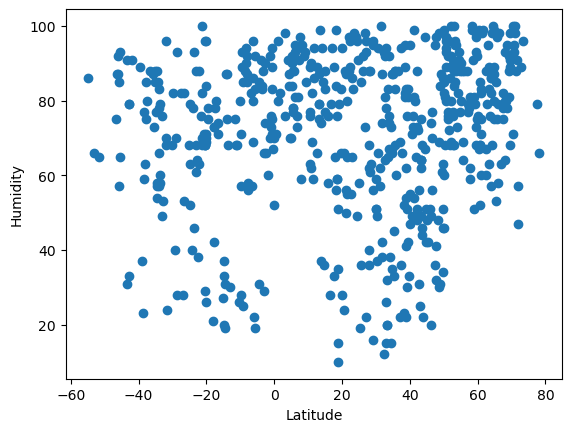

In [80]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

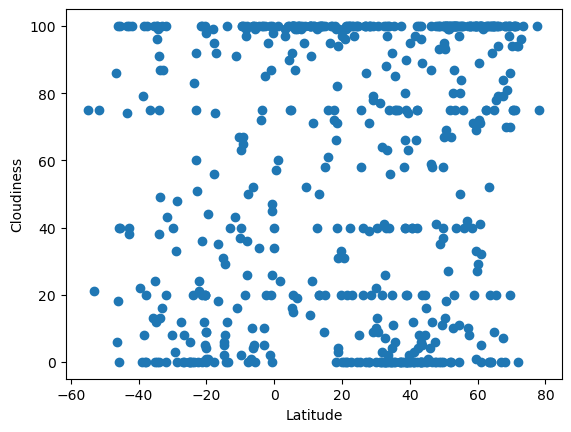

In [81]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

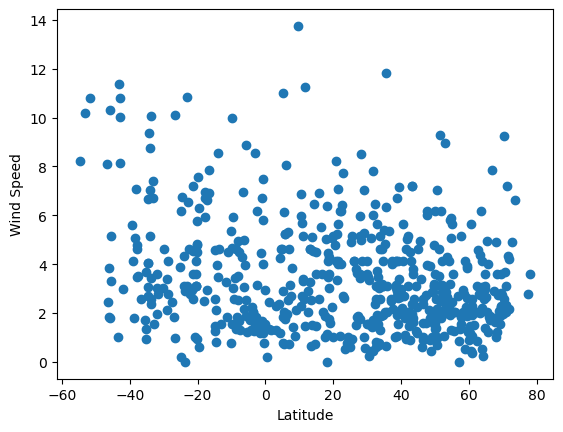

In [82]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [111]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
def plotting_linregress(x_values, y_values, coord_text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values, regress_values, "r-")
    plt.scatter(x_values, y_values)
    plt.annotate(line_eq, coord_text, fontsize=13, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_values.name)
    plt.show()
    

#regr = linear_model.LinearRegression()
#regr.fit(x, y)

#regr

#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,kavaratti,10.5669,72.6420,28.16,76,14,6.87,IN,1690744655
1,juegang,32.3174,121.1855,27.17,93,41,6.48,CN,1690744656
2,hobyo,5.3505,48.5268,24.84,84,16,11.02,SO,1690744656
5,guerrero negro,27.9769,-114.0611,30.32,40,39,3.43,MX,1690744657
6,ribeira grande,38.5167,-28.7000,26.22,89,40,4.12,PT,1690744658


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
3,port alfred,-33.5906,26.8910,12.56,58,13,10.05,ZA,1690744627
4,rosario oeste,-14.8361,-56.4275,36.44,20,2,1.25,BR,1690744657
7,punta arenas,-53.1500,-70.9167,3.01,66,21,10.19,CL,1690744658
9,port elizabeth,-33.9180,25.5701,10.16,66,0,5.14,ZA,1690744659
11,avarua,-21.2078,-159.7750,23.03,100,100,7.20,CK,1690744660


###  Temperature vs. Latitude Linear Regression Plot

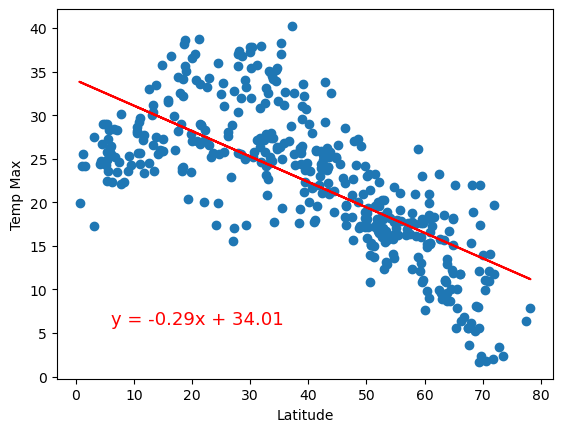

In [120]:
# Linear regression on Northern Hemisphere
plotting_linregress(northern_hemi_df["Lat"], northern_hemi_df['Temp Max'], (6,6) )



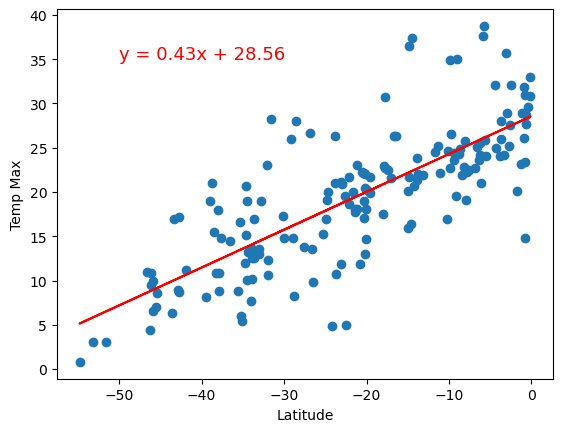

In [122]:
# Linear regression on Southern Hemisphere
plotting_linregress(southern_hemi_df["Lat"], southern_hemi_df['Temp Max'], (-50,35) )


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

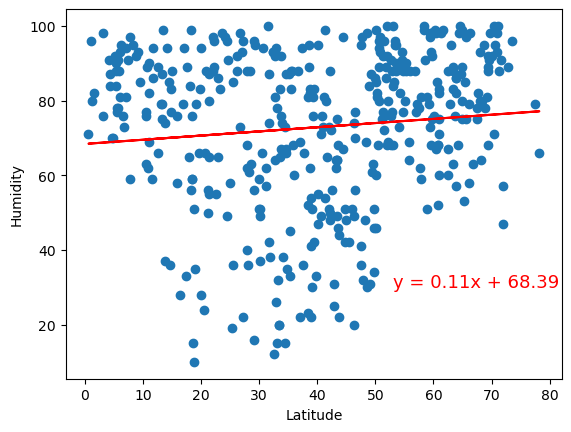

In [125]:
# Northern Hemisphere
plotting_linregress(northern_hemi_df["Lat"], northern_hemi_df['Humidity'], (53,30) )


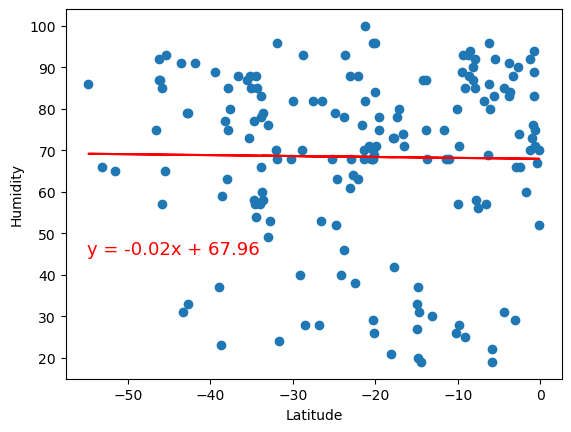

In [127]:
# Southern Hemisphere
plotting_linregress(southern_hemi_df["Lat"], southern_hemi_df['Humidity'], (-55,45) )


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

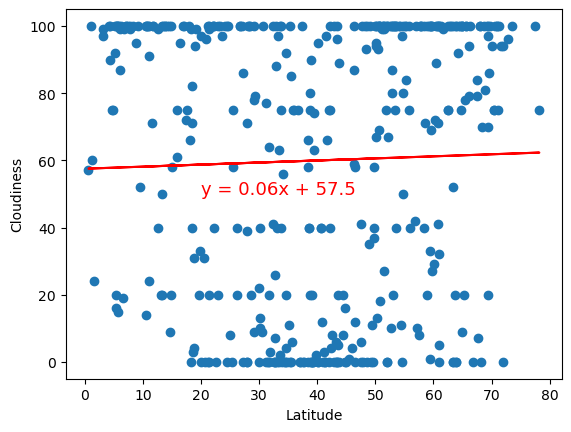

In [128]:
# Northern Hemisphere
plotting_linregress(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], (20,50) )



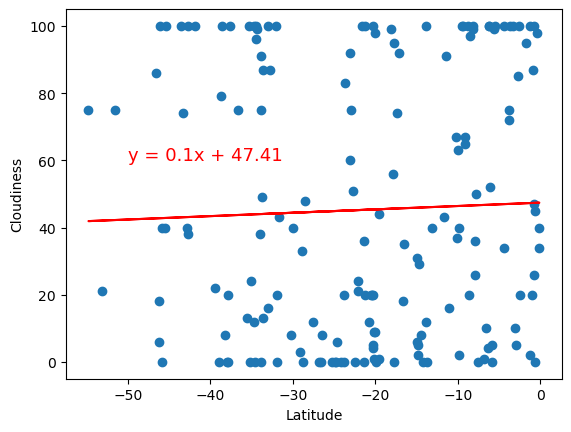

In [129]:
# Southern Hemisphere
plotting_linregress(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'], (-50,60) )


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

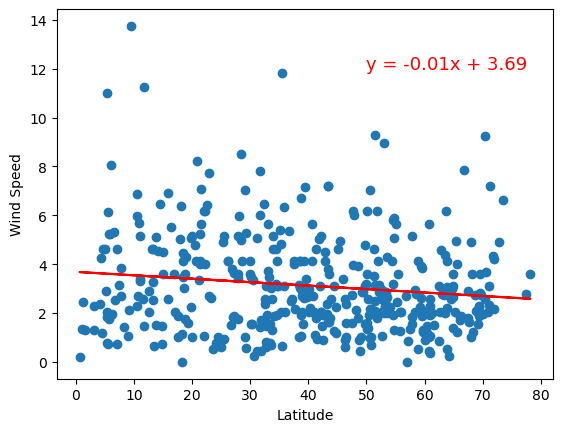

In [131]:
# Northern Hemisphere
plotting_linregress(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'], (50,12) )



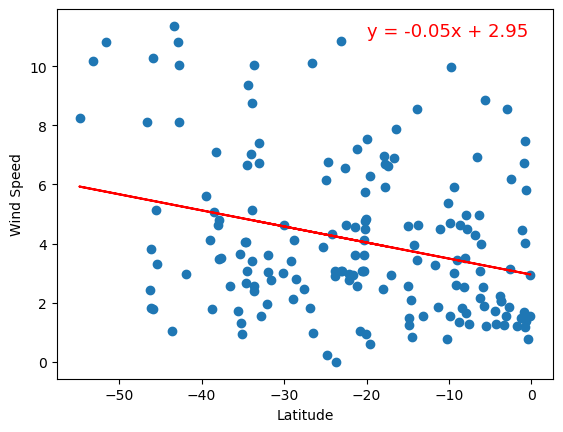

In [132]:
# Southern Hemisphere
plotting_linregress(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'], (-20,11) )


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There is a negative relationship between Temperature and Latitude in the northern hemisphere.
# There is a positive relationship between Temperature and Latitude in the southern hemisphere.

# There is a slightly positive relationship between Humidity and Latitude in the northern hemisphere.
# There is no real relationship between Humidity and Latitude in the southern hemisphere.

# There is no real relationship between Cloudiness and Latitude in the northern hemisphere.
# There is a slightly positive relationship between Cloudiness and Latitude in the southern hemisphere.

# There is slightly negative relationship between Wind Speed and Latitude in the northern hemisphere.
# There is a more negative relationship between Wind Speed and Latitude in the southern hemisphere.

# Temp Max, Humidity, and Cloudiness has a positive relationship with Latitude. Wind speed has a negative relationship with Latitude. 